In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d msambare/fer2013

 86% 52.0M/60.3M [00:01<00:00, 63.7MB/s]
100% 60.3M/60.3M [00:01<00:00, 57.7MB/s]


In [ ]:
# #unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/fer2013.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/CNN/FacialEmotionDetection')
zip_ref.close()

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import os

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Set the path to your project folder
project_folder = '/content/drive/MyDrive/CNN/FacialEmotionDetection'

# Function to load images and labels
def load_data(folder_path):
    X = []  # Images
    y = []  # Labels

    for label in tqdm(os.listdir(folder_path)):
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = cv2.imread(image_path) # Assuming images are in BGR format
                # You may need to resize or preprocess the images based on your requirements
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                gray_image = gray_image/255
                # print(gray_image.shape)
                X.append(gray_image)
                y.append(label)

    return np.array(X), np.array(y)

# Load training data
train_folder = os.path.join(project_folder, 'train')
X_train, y_train = load_data(train_folder)

# Load testing data
test_folder = os.path.join(project_folder, 'test')
X_test, y_test = load_data(test_folder)

# You can use X_train, y_train_encoded, X_test, y_test_encoded in your machine learning model


100%|██████████| 7/7 [01:34<00:00, 13.46s/it]


In [ ]:
os.listdir('/content/drive/MyDrive/CNN/FacialEmotionDetection/train')

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
np.unique(y_train)

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype='<U8')

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# One-hot encode labels
onehot_encoder = OneHotEncoder(sparse=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_onehot = onehot_encoder.fit_transform(y_test_encoded.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_test shape: ", X_test.shape)
print("y_train_onehot shape: ", y_train_onehot.shape)
print("y_test_onehot shape: ", y_test_onehot.shape)

X_train shape:  (28709, 48, 48, 1)
y_test shape:  (7178, 48, 48, 1)
y_train_onehot shape:  (28709, 7)
y_test_onehot shape:  (7178, 7)


In [ ]:
np.save('/content/drive/MyDrive/CNN/FacialEmotionDetection/X_train.npy', X_train)
np.save('//content/drive/MyDrive/CNN/FacialEmotionDetection/X_test.npy', X_test)
np.save('/content/drive/MyDrive/CNN/FacialEmotionDetection/y_train_onehot.npy', y_train_onehot)
np.save('/content/drive/MyDrive/CNN/FacialEmotionDetection/y_test_onehot.npy', y_test_onehot)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Activation , Dropout ,Flatten, LeakyReLU
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization

In [108]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Define the custom CNN model for emotion detection
model = keras.Sequential([
    # Input layer
    layers.Input(shape=(48, 48, 1)),

    # Convolutional layers
    layers.Conv2D(32, (5,5), padding='same'),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3),  padding='valid'),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='valid'),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2)),
    # Flatten layer
    layers.Flatten(),

    # Dense layers
    layers.Dense(128),
    layers.LeakyReLU(),
    layers.Dropout(0.2),

    layers.Dense(32),
    layers.LeakyReLU(),
    layers.Dropout(0.5),

    # Output layer with 7 classes (for each emotion)
    layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 48, 48, 32)        832       
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 22, 22, 64)        0         
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 11, 11, 64)        0         
 ng2D)                                               

In [109]:
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/CNN/FacialEmotionDetection/facial-emotion-detector.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

# Assuming you have a dataset X_train, y_train, X_val, y_val
# You need to preprocess your data appropriately (e.g., resizing, normalization, one-hot encoding)

# Train the model with the ModelCheckpoint callback
hist = model.fit(
    X_train, y_train_onehot,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test_onehot),
    callbacks=[checkpoint_callback]
)

Epoch 1/20
894/898 [============================>.] - ETA: 0s - loss: 1.6676 - accuracy: 0.3384
Epoch 1: val_loss improved from inf to 1.44873, saving model to /content/drive/MyDrive/CNN/FacialEmotionDetection/facial-emotion-detector.h5
898/898 [==============================] - 10s 9ms/step - loss: 1.6673 - accuracy: 0.3386 - val_loss: 1.4487 - val_accuracy: 0.4473
Epoch 2/20
897/898 [============================>.] - ETA: 0s - loss: 1.4360 - accuracy: 0.4512
Epoch 2: val_loss improved from 1.44873 to 1.31211, saving model to /content/drive/MyDrive/CNN/FacialEmotionDetection/facial-emotion-detector.h5
898/898 [==============================] - 6s 6ms/step - loss: 1.4359 - accuracy: 0.4512 - val_loss: 1.3121 - val_accuracy: 0.4987
Epoch 3/20
891/898 [============================>.] - ETA: 0s - loss: 1.3271 - accuracy: 0.4947
Epoch 3: val_loss did not improve from 1.31211
898/898 [==============================] - 6s 7ms/step - loss: 1.3273 - accuracy: 0.4948 - val_loss: 1.3302 - val_ac

In [73]:
  model.save('/content/drive/MyDrive/CNN/FacialEmotionDetection/facial-emotion-detector.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [110]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the 'history' object
# For example:
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
def getCurve(history):
# Plot training and validation loss
  plt.figure(figsize=(12, 4))

  # Plot training loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plot training accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()


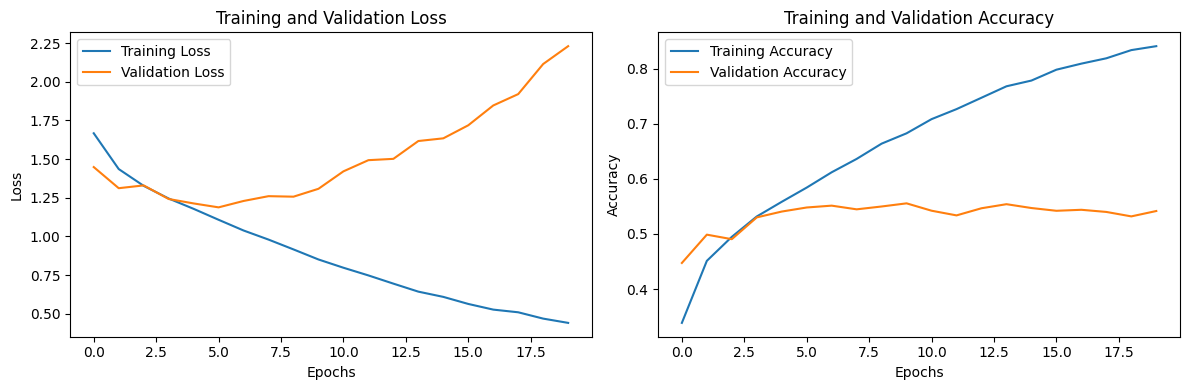

In [111]:
getCurve(hist)

**Real Time Expression Prediction**

In [112]:
import numpy as np
import keras
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder

# Load your trained CNN model
model = keras.models.load_model('/content/drive/MyDrive/CNN/FacialEmotionDetection/facial-emotion-detector.h5')

# Define a function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array

# Function to predict emotion
def predict_emotion(image_path, label_encoder):
    processed_image = preprocess_image(image_path)

    # Make predictions
    predictions = model.predict(processed_image)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Use label encoder's inverse transform to get the emotion label
    predicted_emotion = label_encoder.inverse_transform([predicted_class_index])[0]

    return predicted_emotion

# Test the model on your images
image_paths = ['/content/drive/MyDrive/CNN/FacialEmotionDetection/surprise.jpg', '/content/drive/MyDrive/CNN/FacialEmotionDetection/happy.jpg', '/content/drive/MyDrive/CNN/FacialEmotionDetection/angry.jpg']

# # Example label encoding
# emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
# label_encoder = LabelEncoder()
# label_encoder.fit(emotion_classes)

for img_path in image_paths:
    emotion = predict_emotion(img_path, label_encoder)
    print(f"Image: {img_path}, Predicted Emotion: {emotion}")


1/1 [==============================] - 0s 228ms/step
Image: /content/drive/MyDrive/CNN/FacialEmotionDetection/surprise.jpg, Predicted Emotion: happy
1/1 [==============================] - 0s 18ms/step
Image: /content/drive/MyDrive/CNN/FacialEmotionDetection/happy.jpg, Predicted Emotion: happy
1/1 [==============================] - 0s 17ms/step
Image: /content/drive/MyDrive/CNN/FacialEmotionDetection/angry.jpg, Predicted Emotion: fear


1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


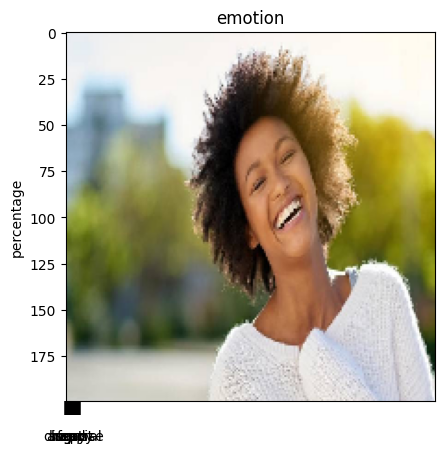

Expression Prediction: happy


In [113]:
from skimage import io
img = image.load_img('/content/drive/MyDrive/CNN/FacialEmotionDetection/happy.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('/content/drive/MyDrive/CNN/FacialEmotionDetection/happy.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])